## A Árvore de Decisão

Árvore de Decisão é um dos mais elementares algoritmos de Machine Learning para modelos de classificação, conhecido principalmente por ser um dos algoritmos menos mágicos e fáceis de entender o seu funcionamento completo. Como se trata de um modelo de classificação, sua função é prever uma classe dentro de um conjunto finito de opções. Um exemplo de aplicação são modelos que preveem se é recomendável ou não liberar crédito para um cliente com base em seu score do Serasa, salário e outros dados.

O funcionamento da Árvore de Decisão visa formar “caminhos” que vão dividindo os dados em pequenos grupos. Essa divisão acontece com base nas características dos dados para que, no final, possamos entrar com um novo registro e o modelo nos dizer em qual classe esse dado se encaixa melhor.

    Ok, ok. Mas de que forma o algoritmo vai saber como construir essa árvore?

Entropia

Entropia pode ser definida como a medida que nos diz o quanto nossos dados estão desorganizados e misturados. Quanto maior a entropia, menor o ganho de informação e vice-versa. Nossos dados ficam menos entrópicos conforme dividimos os dados em conjuntos capazes de representar apenas uma classe do nosso modelo.

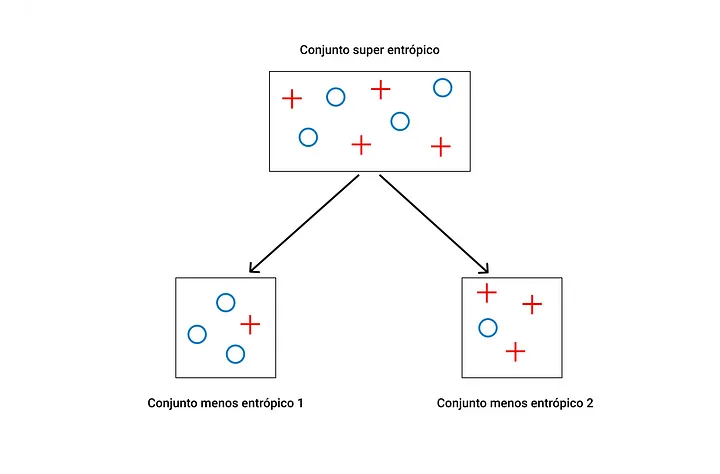

A partir desse momento, nosso objetivo se torna construir nossa árvore tendo o conjunto de dados inteiro como raiz e criar ramificações baseadas em condições que minimizem a entropia e aumentem o ganho de informação. O valor da entropia de um dado pode ser calculado pela seguinte fórmula:

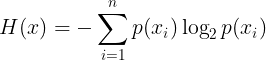

A entropia costuma variar entre 0 e nosso número de classes-1, assumindo seu valor máximo quando as probabilidades de cada classe ocorrer, representadas como p(x) na fórmula, são iguais.

## Ganho de Informação

O ganho de informação é uma medida que nos diz o quão bem uma feature do conjunto de dados separa os registros conforme as suas classes. Ele é calculado no momento em que estamos comparando a entropia do estado atual dos dados com a entropia que seria obtida com uma nova ramificação, dado através da fórmula abaixo:

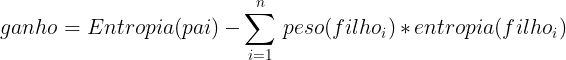

O número de filhos presentes no somatório depende de como a ramificação será feita, mas normalmente são gerados dois nós filhos. Onde o peso para cada um desses filhos é calculado dividindo o total de elementos em um nó filho dividido pelo número de elementos no nó pai:

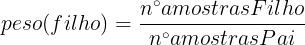

Uma vez sabendo como calcular o ganho de informação, calculamos ele para cada uma das features em nosso dataset e comparamos os resultados para saber qual teve o maior ganho. Sendo assim, nossa ramificação será feita com base na coluna que apresentou o melhor ganho e, então, repetiremos o processo recursivamente para cada lado da ramificação, parando quando o ganho de informação ser igual a 0.

## Tamanho da Árvore e Overfitting

Nosso objetivo com uma Árvore de Decisão é chegar a uma entropia o mais baixa possível. Para isso, nossa árvore precisa crescer e ir formando diversas ramificações, o que é bom!.. até certo ponto.

Quanto maior a altura da nossa árvore, ou seja, quanto mais níveis horizontais de ramificações ela ter, mais adequado aos dados de treinamento nosso modelo estará. No final, se nossa árvore ter uma altura muito grande, isso pode acabar causando overfitting no nosso modelo, que consequentemente pode apresentar predições imprecisas com dados reais.

## Demo em Python

Para a nossa demo de hoje, estaremos usando um dataset sobre vinhos do UCI. Nesse case, devemos conseguir determinar a origem de um vinho(vinhedos 1, 2 e 3) com base em suas características. Vamos começar importando bibliotecas e lendo os dados do nosso dataset:

In [ ]:
## Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import pydotplus

In [ ]:
## Lendo o dataset

dataset = pd.read_csv('/content/wine.data', header = None)

dataset.columns = ['label',
                   'alcohol',
                   'malic_acid',
                   'ash',
                   'alcalinity_of_ash',
                   'magnesium',
                   'total_phenols',
                   'flavanoids',
                   'nonflavanoid_phenols',
                   'proanthocyanins',
                   'color_intensity',
                   'hue',
                   'OD280/OD315',
                   'proline']

In [ ]:
dataset.head()

,label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Agora que podemos manipular nossos dados, vamos prepará-los para o treinamento. Nessa etapa, é importante normalizar os dados — deixá-los em uma mesma escala — para que nosso modelo não considere uma variável mais importante que outra. Além disso, devemos dividir nossos dados em um conjunto de treinamento e outro de validação para que possamos checar a precisão do modelo pós-treinamento.

In [ ]:
# O modelo
## Divisão treino-teste

from sklearn.model_selection import train_test_split

x = dataset.values[:, 1:]
y = dataset.values[:, 0] # a primeira coluna do dataset indica a origem do vinho

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

Com os dados preparados, o que falta fazer agora é o treinamento em si. Vamos criar uma função que, recebendo uma altura de árvore, treina o modelo com base nessa altura e então executar de 1 a 20.


In [ ]:
# Treinamento

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_model(height):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
  model.fit(x_train, y_train)
  return model

In [ ]:
#Avaliação do Modelo

for height in range(1, 21): # 1-20
  model = train_model(height)
  y_pred = model.predict(x_test)

  print('--------------------------------------------------------------\n')
  print(f'Altura - {height}\n')
  print("Precisão: " + str(accuracy_score(y_test, y_pred)))

--------------------------------------------------------------

Altura - 1

Precisão: 0.5555555555555556
--------------------------------------------------------------

Altura - 2

Precisão: 0.9444444444444444
--------------------------------------------------------------

Altura - 3

Precisão: 0.9444444444444444
--------------------------------------------------------------

Altura - 4

Precisão: 0.9166666666666666
--------------------------------------------------------------

Altura - 5

Precisão: 0.9166666666666666
--------------------------------------------------------------

Altura - 6

Precisão: 0.9166666666666666
--------------------------------------------------------------

Altura - 7

Precisão: 0.9166666666666666
--------------------------------------------------------------

Altura - 8

Precisão: 0.9166666666666666
--------------------------------------------------------------

Altura - 9

Precisão: 0.9166666666666666
-------------------------------------------------------

No final, conseguimos uma precisão máxima de 94,44% ao testar o modelo com os dados de teste. Esse é um indicador excelente! Foi possível notar também que nossa precisão caiu para 91,66% em alturas maiores que três, não deixando de ser uma precisão ótima. Para exportarmos nossa árvore com os melhores resultados, usaremos o trecho de código abaixo:

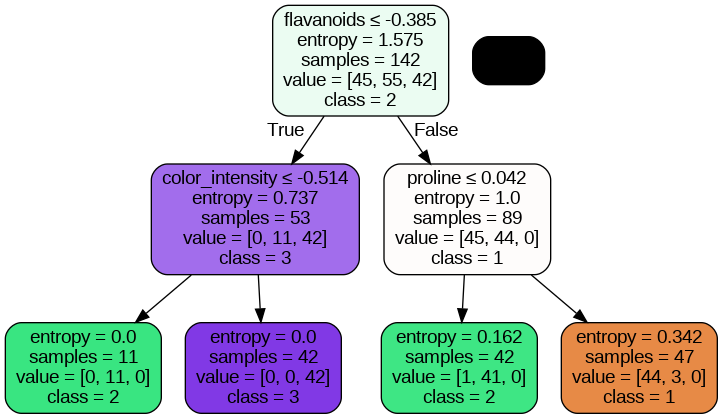

In [ ]:
# Exportando árvore

from IPython.display import Image
from sklearn.tree import export_graphviz

model = train_model(2)


feature_names = ['alcohol',
                 'malic_acid',
                 'ash',
                 'alcalinity_of_ash',
                 'magnesium',
                 'total_phenols',
                 'flavanoids',
                 'nonflavanoid_phenols',
                 'proanthocyanins',
                 'color_intensity',
                 'hue',
                 'OD280/OD315',
                 'proline']

classes_names = ['%.f' % i for i in model.classes_]

dot_data = export_graphviz(model, filled=True, feature_names=feature_names, class_names=classes_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')

A imagem acima representa a árvore de decisão do nosso modelo. Cada nó contém uma série de informações úteis como:

* A condição da ramificação que gera os nós filhos(leve em conta que os valores continuam numa mesma escala), onde nós à esquerda atendem e os a direita não atendem essa condição;
* O valor da entropia para os amostras do nó atual;
* O número de amostras presente no nó atual;
* A classe mais presente no nó atual.

## Conclusão

Com esse tutorial, foi possível conhecermos um dos modelos de classificação mais práticos do mundo de Machine Learning. Caso você tenha se interessado por modelos de classificação e curtido o modelo de Árvore de Decisão em específico, recomendo dar uma olhada no modelo de Random Forest.

In [ ]:
model.predict(x_test)

array([1., 3., 2., 1., 2., 2., 1., 3., 2., 2., 3., 3., 1., 2., 3., 2., 1.,
       1., 3., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 3., 1., 1., 2., 1.,
       1., 1.])

In [ ]:
x_test

array([[ 9.38847070e-01, -6.32166068e-01, -4.35010303e-01,
        -9.19695615e-01,  1.26324041e+00,  5.59998633e-01,
         9.77754158e-01, -1.20637533e+00,  2.36680192e-02,
         3.39284695e-01, -1.45574805e-01,  8.52295413e-01,
         1.04940526e+00],
       [-2.42263344e-01,  2.67579163e-01,  4.20859365e-01,
         7.12764102e-01,  8.40672358e-01, -1.27747161e+00,
        -6.05828120e-01, -9.70634096e-01, -5.87397203e-01,
         2.42611713e+00, -2.06608025e+00, -1.55017035e+00,
        -8.66598582e-01],
       [-7.64438475e-01, -1.11802849e+00, -7.69915825e-01,
        -1.61767889e-01, -9.20027861e-01,  2.03653722e+00,
         1.18341419e+00, -1.36353615e+00,  4.48018868e-01,
        -2.50930538e-01,  1.16386073e+00,  3.94021597e-01,
        -1.06480588e+00],
       [ 7.15057728e-01, -5.78181354e-01,  3.46435916e-01,
         2.75498106e-01,  1.12238439e+00,  1.15061407e+00,
         8.54358136e-01, -1.28495574e+00,  1.43251284e+00,
         5.07917619e-01,  1.16312302e

In [ ]:
dataset_iris = pd.read_csv('/content/iris.csv')

In [ ]:
dataset_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# O modelo
## Divisão treino-teste

from sklearn.model_selection import train_test_split

x = dataset_iris.values[:, :4]
y = dataset_iris.values[:, -1] # a primeira coluna do dataset indica a origem do vinho

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Treinamento

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_model(height):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
  model.fit(x_train, y_train)
  return model

In [ ]:
#Avaliação do Modelo

for height in range(1, 21): # 1-20
  model = train_model(height)
  y_pred = model.predict(x_test)

  print('--------------------------------------------------------------\n')
  print(f'Altura - {height}\n')
  print("Precisão: " + str(accuracy_score(y_test, y_pred)))

--------------------------------------------------------------

Altura - 1

Precisão: 0.5666666666666667
--------------------------------------------------------------

Altura - 2

Precisão: 0.9666666666666667
--------------------------------------------------------------

Altura - 3

Precisão: 0.9666666666666667
--------------------------------------------------------------

Altura - 4

Precisão: 1.0
--------------------------------------------------------------

Altura - 5

Precisão: 1.0
--------------------------------------------------------------

Altura - 6

Precisão: 1.0
--------------------------------------------------------------

Altura - 7

Precisão: 1.0
--------------------------------------------------------------

Altura - 8

Precisão: 1.0
--------------------------------------------------------------

Altura - 9

Precisão: 1.0
--------------------------------------------------------------

Altura - 10

Precisão: 1.0
------------------------------------------------------

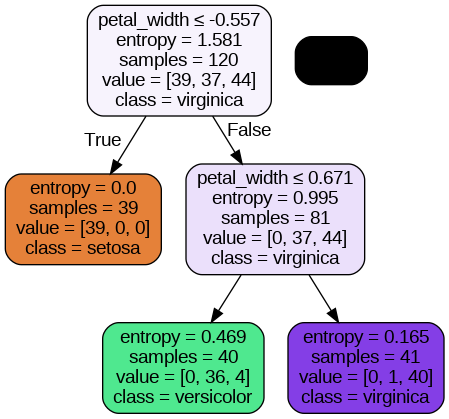

In [ ]:
# Exportando árvore

from IPython.display import Image
from sklearn.tree import export_graphviz

model = train_model(2)


feature_names = ['sepal_length',
                 'sepal_width',
                 'petal_length',
                 'petal_width']

classes_names = ['setosa', 'versicolor','virginica']

dot_data = export_graphviz(model, filled=True, feature_names=feature_names, class_names=classes_names, rounded=True, special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')

In [ ]:
dataset_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
